In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(-5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0


In [3]:
# You can drop RowNumber , CustomerId,	Surname as it doesn't have any significance

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
 df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


#### Label encoding and one hot encoding

In [8]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df,columns = ['Geography'] , drop_first = True)

#### Feature selection

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [11]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure','Balance','NumOfProducts',
            'HasCrCard','IsActiveMember','EstimatedSalary',
            'Geography_Germany','Geography_Spain']
X = df[features]
y = df['Exited']

In [12]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

#### Feature scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

#### Random Forest

In [17]:
# n_estimators is no. of decision trees that will be created in random forest
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [18]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Evaluate model

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [21]:
# confusion matrix is table to evaluate performance of classification models -
# -it shows factual vs predicted classifications [true negative   false positive]
#                                                [false negative  true positive]

print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


In [22]:
#CONFUSION MATRIX
# 1551 - model correctly predicted negative classes i.e. predicted the customer did not
# churn and customer didnt churn 

# 57 - model incorrectly predicted positive classes, type 1 error ,model  predicted 
# the customer would churn but  customer didnt churn

# 211 - model incorrectly predicted negative classes, type 2 error, ,model  predicted  
# the customer would not churn but  customer did churn

# 182 - model correctly predicted positive classes, predicted the customer would
# churn and customer did churn 

In [23]:
#CLASSIFICATION REPORT
# 1 - churned, 0 - didnt churned
# Precision = true positive / (true positive+ false positive)
# recall = true positive / (true positive+ false negative)
#f1 harmonic mean of precision and recall


#ACCURACY SCORE = (true positive+ true negative) / (true positive+ true negative + true negative +  false positive + false negative)

#### visualize feature importance

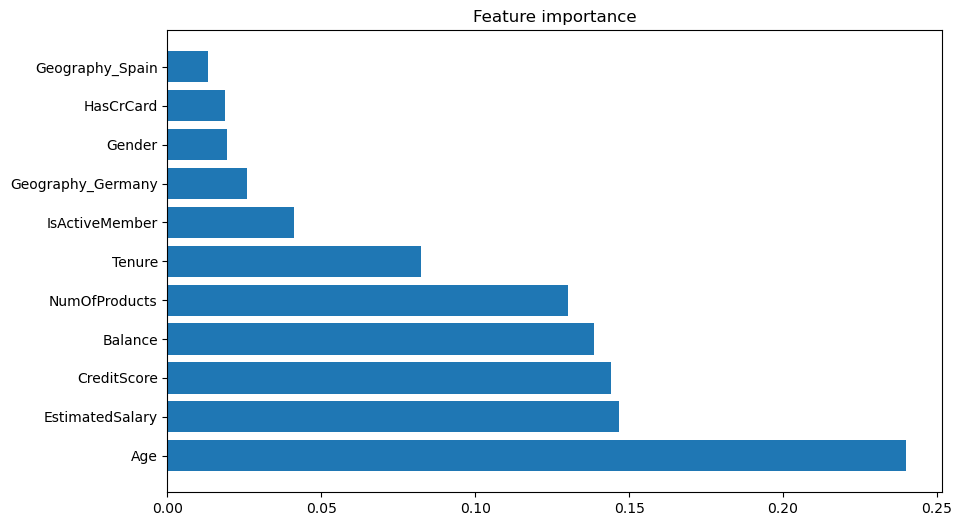

In [25]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize = (10,6))
plt.title("Feature importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

In [26]:
# can use logistic regression , support vector machine , k nearest neighbor, GBM or graded
# boosting machines, neural NZ decision , naive bayes

#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state= 42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [29]:
y_pred_log_reg = log_reg.predict(X_test)


In [30]:
#Evaluate model performance
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(conf_matrix_log_reg)
print(class_report_log_reg)
print(accuracy_log_reg)

[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

0.811


In [31]:
# Accuracy lower than random forest

#### SVM

In [33]:
from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear', random_state = 42)
svm_model.fit(X_train, y_train)

#Make predictions
y_pred_svm = svm_model.predict(X_test)

from sklearn.metrics import precision_score

# Assuming y_true and y_pred are your true and predicted labels
precision = precision_score(y_test, y_pred_svm,average = 'macro', zero_division=0)

In [34]:
# Evaluate model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(conf_matrix_svm)
print(class_report_svm)
print(accuracy_svm)


[[1607    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

0.8035


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### KNN -K Nearest Neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
#Make prediction
y_pred_knn = knn_model.predict(X_test)

In [38]:
#Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(conf_matrix_knn)
print(class_report_knn)
print(accuracy_knn)

[[1514   93]
 [ 247  146]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000

0.83


#### Gradient Boosting Model

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators = 100 , random_state = 42)
gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)


In [41]:
#Evaluate the model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(conf_matrix_gbm)
print(class_report_gbm)
print(accuracy_gbm)

[[1543   64]
 [ 201  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

0.8675


In [42]:
#siilar to random forest, but decision recall is better

## run all models with feature engineering 

In [44]:
#feature engineering
df = pd.read_csv('Churn_Modelling.csv')

#Binary feature for balance
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

#Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins =[18,25,35,45,55,65,75,85,95],
                        labels = ['18-25','26-35', '36-45','46-55','56-65',
                        '65-75','76-85','86-95'])

#Balance to salary Ratio
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

#Interaction feature between NumOfProducts and IsActiveMember
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']

#Tenure Grouping
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0,2,5,7,10], labels =['0-2','3-5','6-7','8-10'])

In [45]:
#Label encoding
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df,columns = ['Geography'] , drop_first = True)
df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

In [48]:
#one hot encoding
df = pd.get_dummies(df, columns= ['AgeGroup','TenureGroup'], drop_first = True)

In [50]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure','Balance','NumOfProducts',
            'HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany',
            'Geography_Spain','BalanceZero','BalanceToSalaryRatio','ProductUsage',
            'Male_Germany','Male_Spain'] + [col for col in df.columns if 'AgeGroup_'
                                            in col or 'TenureGroup_' in col]
X = df[features]
y = df['Exited']

In [52]:
#Split into train and test sets
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# n_estimators is no. of decision trees that will be created in random forest
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [58]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(class_report)
print(accuracy)

[[1548   59]
 [ 212  181]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

0.8645


In [62]:
#Before was slightly better